In [3]:
import os,glob
import numpy as np
from scipy import spatial
from IPython.display import Image,display
index,files,start = [],{},0
for fname in glob.glob("index/*.npy"):
    index.append(np.load(fname))
    for f in file(fname.replace(".feats_pool3.npy",".files")):
        files[start] = f.strip()
        start += 1        
index = np.concatenate(index)
print "Files ",len(files),"Index ",index.shape

Files  65992 Index  (65992, 2048)


In [4]:
def download(filename,query,rank):
    try:
        os.mkdir("examples")
    except:
        pass    
    try:
        os.mkdir("examples/{}".format(query))
    except:
        pass    
    os.system("aws s3 cp s3://aub3data/dataset/{} examples/{}/{}.jpg".format(filename.split("/")[-1],query,rank))

Total Results:  (65992,)
Query	Distance	0.0	Filename:	/mnt/dataset/candice_swanepoel_4165709.jpg


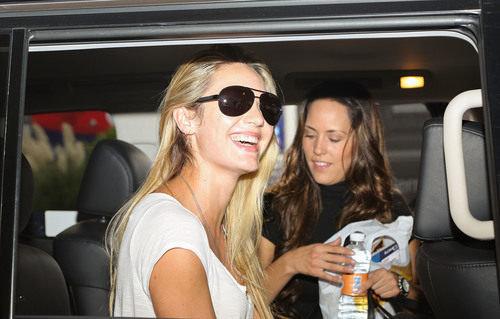

1	Distance	14.01	Filename:	/mnt/dataset/candice_swanepoel_8281125.jpg


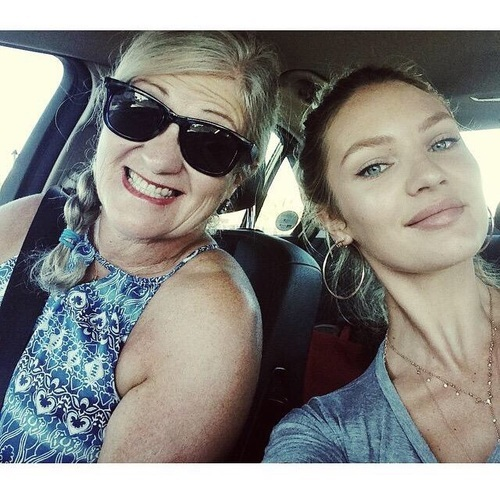

2	Distance	14.43	Filename:	/mnt/dataset/amanda_wellsh_8259147.jpg


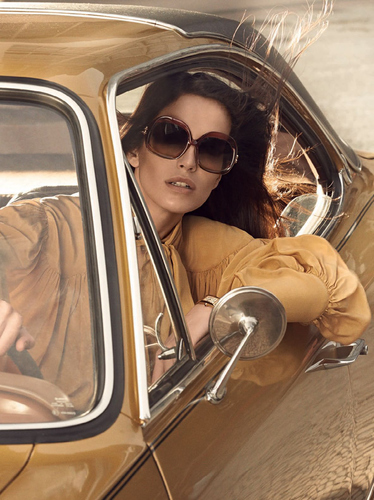

3	Distance	14.67	Filename:	/mnt/dataset/candice_swanepoel_3982769.jpg


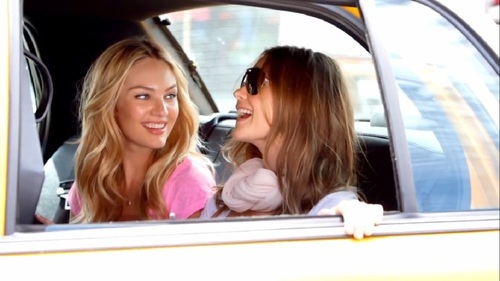

4	Distance	14.72	Filename:	/mnt/dataset/behati_prinsloo_3983020.jpg


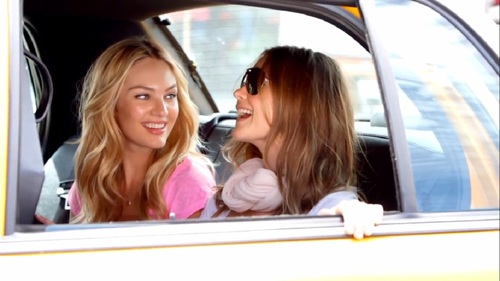

In [9]:
query = 45205
query_vector = index[query]
dist = spatial.distance.cdist(query_vector[np.newaxis,:],index)
ranked = np.squeeze(dist.argsort())
print "Total Results: ",ranked.shape
for i,k in enumerate(ranked[:5]):
    print "{}\tDistance\t{}\tFilename:\t{}".format(i if i else "Query",round(dist[0,k],2),files[k])
    download(files[k],query,i)
    display(Image(filename="examples/{}/{}.jpg".format(query,i)))